# Image Thresholding

### What is  Thresholding?

        Thresholding is the simplest segmentation technique. From a grayscale image, thresholding can be used to create binary images. 

![Threshold](Threshold_Tutorial_Theory_Example.jpg)


### 1. Simple Thresholding

        In Simple Thresholding if pixel value is greater than a threshold value, it is assigned one value, else it  is assigned another value.

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img.jpg',0)
img2 = cv2.imread('sudoku.jpg',0)
img3=cv2.imread('Shape.png',0)

Reading an image and storing as Grayscale Image 

In [7]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

First argument in the function cv2.threshold is the source image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. Fourth argument is for style of Thresholding.The function has 2 output params ret and thresh ,thresholded image is stored in thresh and ret is the threshold parameter (Only in this case).

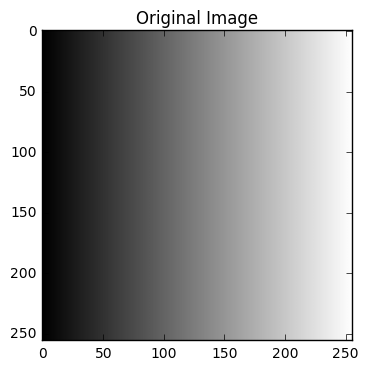

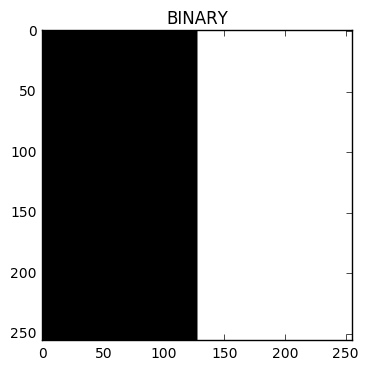

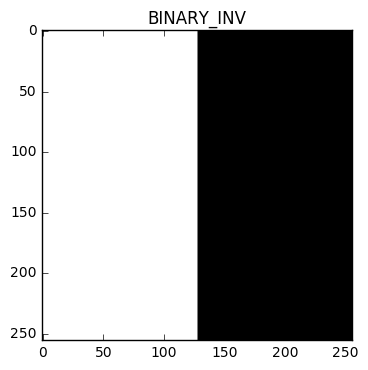

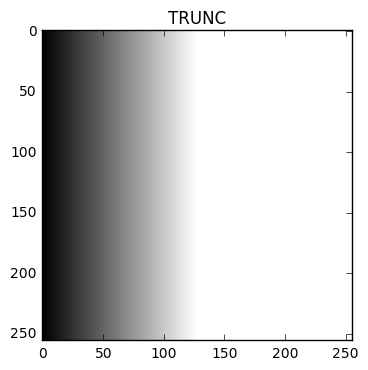

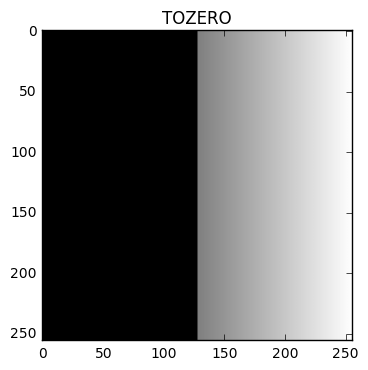

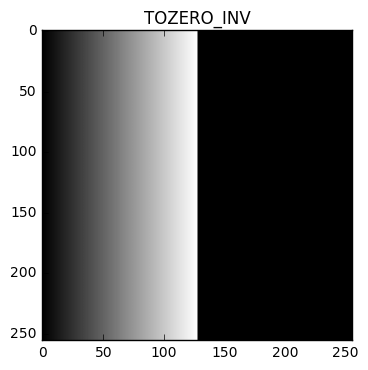

In [8]:

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in np.arange(6):
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.show()
    

### 2. Adaptive Thresholding

                In Simple Thresholding we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

Lets try thresholding on Sudoku image
![Threshold2](sudoku.jpg)

In [9]:
ret,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)

In [10]:
th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

The function has 6 input params and 1 output params.
Adaptive Method - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
Block Size - It decides the size of neighbourhood area.
C - It is just a constant which is subtracted from the mean or weighted mean calculated.

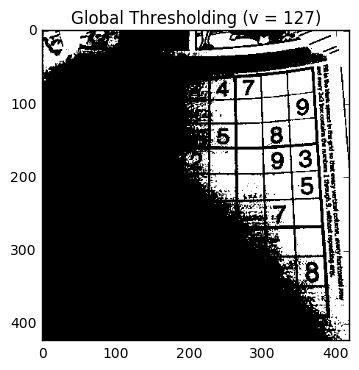

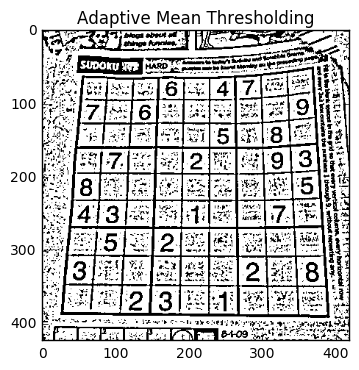

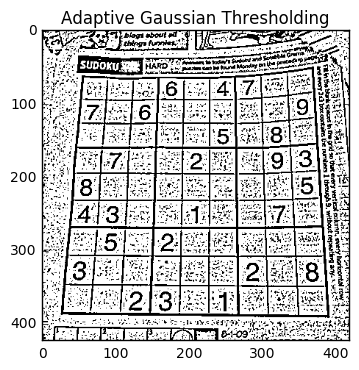

In [11]:
titles = [ 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th1, th2, th3]

for i in np.arange(3):
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.show()

#### Otsu's Thresholding

                        In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

                        For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.
                

Lets try thresholding on this color image.
![Threshold3](Shape.png)

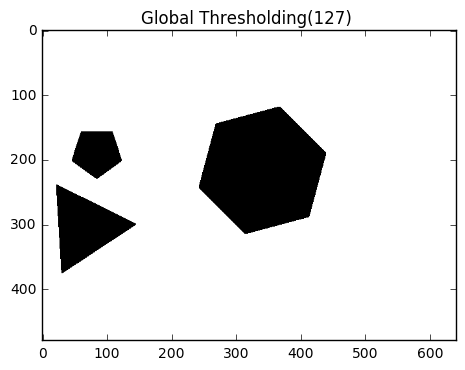

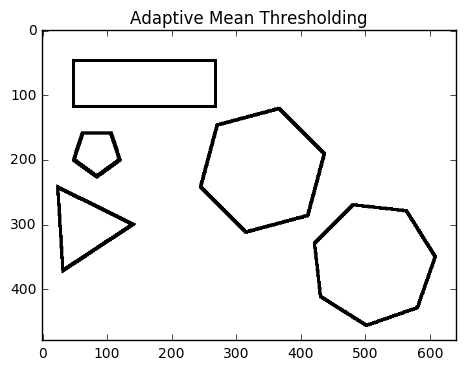

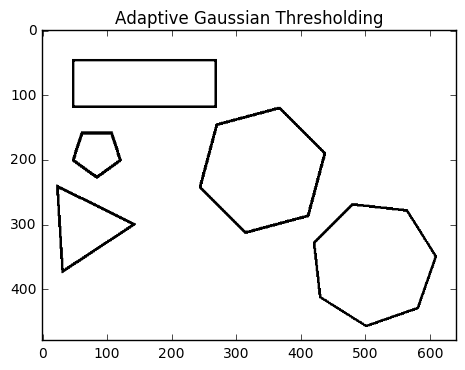

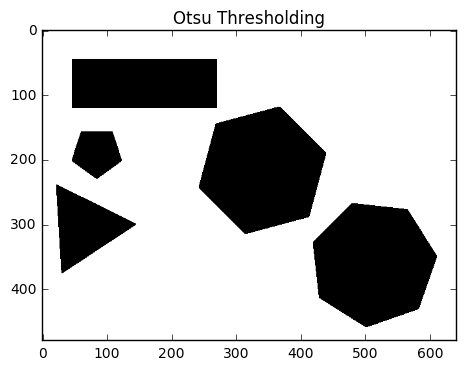

Threshold value: 177.0


In [14]:
ret,th1 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret2,th4 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = [ 'Global Thresholding(127) ','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding','Otsu Thresholding']
images = [th1, th2, th3,th4]

for i in np.arange(4):
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.show()
print('Threshold value:',ret2)

Think why Global and Adaptive Thresholding failed here??

In this Notebook we tried Thresholding on GrayScale Images. Try thresholding on Coloured images yourself and Observe.

#### Reference
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding